In [6]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
from torch.optim import Adam
from torchvision import datasets
from torchvision.transforms import transforms 

In [11]:
data_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Resize(32),
        transforms.Normalize((0.5,),(1.0,)) # 평균이 0.5이고 표준편차가 1.0으로 간소화 해서 간이정규화
    ]
)

train_data = datasets.MNIST(root='./',train=True,download=True,transform=data_transform)
test_data = datasets.MNIST(root='./',train=False,download=True,transform=data_transform)
train_data
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=32, interpolation=bilinear, max_size=None, antialias=True)
               Normalize(mean=(0.5,), std=(1.0,))
           )

In [12]:
train_data.data.shape # 데이터 로더 통과시켜야 바뀜

torch.Size([60000, 28, 28])

In [14]:
from torch.utils.data import DataLoader # 배치사이즈 및 랜덤으로 섞는 역할

train_loader = DataLoader(train_data,batch_size=32,shuffle=True)
test_loader = DataLoader(test_data,batch_size=32)

In [18]:
next(iter(train_loader))[0].shape

torch.Size([32, 1, 32, 32])

In [55]:
class Lenet(nn.Module):
    def __init__(self):
        super(Lenet,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5,stride=1) # 5*5레이어를 1칸씩 이동하며 특징을 뽑아냄
        #self.conv1_tanh = nn.Tanh()
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1)
        self.conv3 = nn.Conv2d(in_channels=16,out_channels=120,kernel_size=5,stride=1)
        self.fc1 = nn.Linear(in_features=120,out_features=84)
        self.fc2 = nn.Linear(in_features=84,out_features=10)
        
    def forward(self,x):
        x = self.conv1(x)
        x = F.tanh(x) # 활성화 함수 통과 ( 모델 정보 보기시 내용 출력 안됨. )
        #x = self.conv1_tanh(x)
        x = F.max_pool2d(x,2,2) # 이미지를 반으로 줄이겠다 (Subsampling)

        x = self.conv2(x)
        x = F.tanh(x)
        x = F.max_pool2d(x,2,2) # 이미지를 반으로 줄이겠다 (Subsampling)

        x = self.conv3(x)
        x = F.tanh(x)

        x = x.view(-1,120) # 120개의 데이터를 1차원으로 평평하게 편다 
        x = self.fc1(x)
        x = F.tanh(x)
        
        x = self.fc2(x)
        x = F.tanh(x)

        return x


In [24]:
model = Lenet()
model

Lenet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv1_tanh): Tanh()
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)

In [26]:
list(model.parameters())

[Parameter containing:
 tensor([[[[ 0.1434, -0.1272,  0.0624,  0.1824,  0.1791],
           [-0.0587,  0.0182, -0.1019,  0.0316, -0.1736],
           [-0.1093, -0.1399, -0.0412, -0.0749, -0.0535],
           [ 0.0823,  0.1770,  0.0988, -0.1143,  0.0030],
           [ 0.0412, -0.0918, -0.1788,  0.1732, -0.0948]]],
 
 
         [[[ 0.0842, -0.0515,  0.1529, -0.1006,  0.1884],
           [-0.0093, -0.0739,  0.1796,  0.0313, -0.0084],
           [-0.0342,  0.0634, -0.1035,  0.0899,  0.0514],
           [ 0.0177, -0.0549,  0.0128, -0.1753,  0.1302],
           [-0.1784, -0.1964, -0.1905,  0.0330, -0.1907]]],
 
 
         [[[ 0.1243, -0.0771,  0.0605, -0.1231,  0.1753],
           [-0.1077,  0.0965,  0.1495, -0.1017, -0.1232],
           [ 0.0174, -0.0446,  0.1176, -0.1572,  0.0417],
           [ 0.1825, -0.0858, -0.1559,  0.1793, -0.0301],
           [-0.0334,  0.1682, -0.0813,  0.1184,  0.0808]]],
 
 
         [[[ 0.0645,  0.1973,  0.1385,  0.1878,  0.0847],
           [ 0.1056,  0.1226, -

In [27]:
model(torch.randn((1,1,32,32)))

tensor([[ 0.0258, -0.1056, -0.1282, -0.1691, -0.0502, -0.0085, -0.0177, -0.0925,
         -0.0251,  0.1463]], grad_fn=<TanhBackward0>)

In [30]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [32]:
model.to(device)

Lenet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv1_tanh): Tanh()
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)

In [33]:
#uv add torchsummary
from torchsummary import summary
summary(model,input_size=(1,32,32),device=device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
            Conv2d-2           [-1, 16, 10, 10]           2,416
            Conv2d-3            [-1, 120, 1, 1]          48,120
            Linear-4                   [-1, 84]          10,164
            Linear-5                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.24
Estimated Total Size (MB): 0.29
----------------------------------------------------------------


In [81]:
# 학습 시키기
# uv add tqdm 반복문에서 진행률 보여주는 라이브러리
# uv add tensorboard
import tqdm
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter() # 손실율을 그래프로 시각화 해주는 라이브러리

optim = Adam(model.parameters(),lr = 3e-3) # 0.3 -> 0.00005
criterion = nn.CrossEntropyLoss() # 손실함수

epochs = 1 # 전체 데이터 10번학습
count = 0
total = 0

# 체크포인트 불러오기
# 가져온값 적용
for epoch in range(epochs):
    train_tqdm = tqdm.tqdm(train_loader) # 반복문 진행을 보여주는 라이브러리
    for data,label in train_tqdm:
        data = data.to(device)
        label = label.to(device)

        optim.zero_grad() # 기울기 초기화
        
        pred = model(data) # 학습
        
        loss = criterion(pred,label) # 손실률

        writer.add_scalar('Loss/train',loss,count) # 손실률 기록 (그래프 Y : loss, X : count)
        count +=1

        loss.backward() # 역전파
        optim.step() # 가중치 설정

        train_tqdm.set_description(f'epoch : {epoch+1} loss : {loss.item():.2f}') # .2f 소숫점 두번째자리까지

        #검증 데이터 셋
        _,pred = torch.max(pred,1)
        (pred==label).sum().item()
        total_corr += (pred==label).sum().item()
        total += len(label)

    print(f'Acc{total_corr/total}')
    # 3. 체크포인트마다 저장하는 방법 : 자주사용 (딕셔너리)
    torch.save({
        'epoch' : epoch,
        'model_state_dict':model.state_dict(),
        'optimizer_state_dict' : optim.state_dict(),
        'loss' : loss
    },'checkpoint.pth')

epoch : 1 loss : 0.83: 100%|██████████| 1875/1875 [00:46<00:00, 40.46it/s]


Acc3.9713666666666665


In [44]:
writer.close()

In [ ]:
model.eval() # 학습은 끝내고 테스트버전으로 사용하겟다는 선언
# model.train() # 모델을 학습용으로 사용하겠다

with torch.no_grad():
    total_corr = 0
    for img,labels in test_loader:
        img = img.to(device)
        labels = labels.to(device)

        preds = model(img)

        _,pred = torch.max(preds,1)

        (pred==labels).sum().item()
        total_corr += (pred==labels).sum().item()

    print(f'Acc{total_corr/len(test_data.targets)}')


Acc0.9884


In [ ]:
# uv pip install setuptools==69.5.1
# tensorboard --logdir=runs

# python version 3.12 버전이 안정적


Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\potenup3\prj_deep\.venv\Scripts\tensorboard.exe\__main__.py", line 4, in <module>
  File "C:\potenup3\prj_deep\.venv\Lib\site-packages\tensorboard\main.py", line 27, in <module>
    from tensorboard import default
  File "C:\potenup3\prj_deep\.venv\Lib\site-packages\tensorboard\default.py", line 30, in <module>
    import pkg_resources
ModuleNotFoundError: No module named 'pkg_resources'


In [49]:
F.softmax(preds) # 각각의 값들을 확률로 바꿈 (전체합이 1임)

C:\Users\user\AppData\Local\Temp\ipykernel_17160\2047342448.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(preds) # 각각의 값들을 확률로 바꿈 (전체합이 1임)


tensor([[0.0610, 0.4509, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610,
         0.0610],
        [0.0610, 0.0610, 0.4509, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610,
         0.0610],
        [0.0610, 0.0610, 0.0610, 0.4509, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610,
         0.0610],
        [0.0610, 0.0610, 0.0610, 0.0610, 0.4509, 0.0610, 0.0610, 0.0610, 0.0610,
         0.0610],
        [0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.4509, 0.0610, 0.0610, 0.0610,
         0.0610],
        [0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.4509, 0.0610, 0.0610,
         0.0610],
        [0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.4509, 0.0610,
         0.0610],
        [0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.4509,
         0.0610],
        [0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610,
         0.4509],
        [0.4508, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0611,
         0.0610],
        [0

In [ ]:
# 1. 모델저장(가장많이 사용) : 가중치만 저장하는 방법
torch.save(model.state_dict(),'lenet_cnn.pth')

In [51]:
model_new = Lenet()
model_new.load_state_dict(torch.load('lenet_cnn.pth')) # 기존 모델의 구조를 알고 있어야한다.

<All keys matched successfully>

In [ ]:
# 2. 모델을 통째로 저장하는 방법 : 보안에 취약
torch.save(model,'model_all.pth')

In [ ]:
# 3. 체크포인트마다 저장하는 방법 : 자주사용 (딕셔너리)
torch.save({
    'epoch' : epoch,
    'model_state_dic':model.state_dict(),
    'optimizer_state_dic' : optim.state_dict(),
    'loss' : loss
},'checkpoint.pth')

In [ ]:
# 3 불러올때
checkpoint = torch.load('checkpoint.pth')
model.load_state_dict(checkpoint['model_state_dic'])
optim.load_state_dict(checkpoint['optimizer_state_dic'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']


for epoch in range(epochs):
    train_tqdm = tqdm.tqdm(train_loader) # 반복문 진행을 보여주는 라이브러리
    for data,label in train_tqdm:
        data = data.to(device)
        label = label.to(device)

        optim.zero_grad() # 기울기 초기화
        
        pred = model(data) # 학습
        
        loss = criterion(pred,label) # 손실률

        writer.add_scalar('Loss/train',loss,count) # 손실률 기록 (그래프 Y : loss, X : count)
        count +=1

        loss.backward() # 역전파
        optim.step() # 가중치 설정

        train_tqdm.set_description(f'epoch : {epoch+1} loss : {loss.item():.2f}') # .2f 소숫점 두번째자리까지

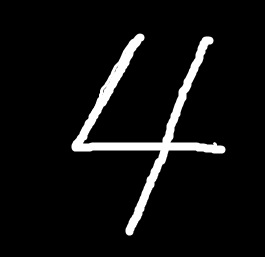

In [ ]:
# 실전 infer(추론)
from PIL import Image # 이미지를 불러올때 사용하는 라이브러리

img = Image.open('./data/4.png') # tensor 형태의 shpe 맞추기
img

In [60]:
img.size

(265, 257)

In [63]:
import numpy as np

img_np = np.array(img)
img_np.shape 

# 1. tensor 로 바꾼다.
# 2. 흑백으로 바꾼다.
# 3. size를 학습사이즈로 바꾼다.


(257, 265, 3)

In [64]:
# 학습할때 전처리 그대로 가져와 전처리 함
infer_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Grayscale(),
        transforms.Resize(32),
        transforms.Normalize((0.5,),(1.0,))# 간이 정규화
    ]
)

img = infer_transform(img_np) # 원본 그대로 넣어도 됨

In [66]:
img.size()

torch.Size([1, 32, 32])

In [67]:
pred = model(img.to(device))


In [68]:
pred

tensor([[-1.0000, -1.0000, -1.0000, -1.0000,  1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000]], device='cuda:0', grad_fn=<TanhBackward0>)

In [76]:
result = torch.max(pred,1)[1].item()
result

4